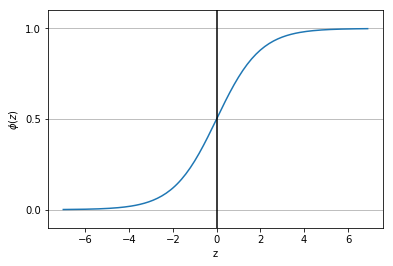

In [1]:
"""This notebook contains notes regarding LOGIT
LOGIT is defined as the logarithm of the odds ratio, ie

logit(p) = log(p/(1 - p))

where log is the *natural* logarithm.

For machine learning, we are interested in calculating the inverse function of logit,
ie the sigmoid:

phi(z) = 1 / (1 + e ** (-z))

where z is the net input.
"""


import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

# Define a linear set of values
z = np.arange(-7, 7, 0.1)

phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color="k")  # Vertical line on 0x
plt.ylim(-0.1, 1.1)
plt.xlabel("z")
plt.ylabel("$\phi (z)$")  # Use the $ signs to switch on the latex-like syntax
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()  # Get Current Axes
ax.yaxis.grid(True)
plt.show()

In [2]:
"""When using LOGIT for Machine Learning,
it is usually put as an ACTIVATION function, ie the function that maps from the net input
to the valid internal output space (I hope.)"""

'When using LOGIT for Machine Learning,\nit is usually put as an ACTIVATION function, ie the function that maps from the net input\nto the valid internal output space (I hope.)'

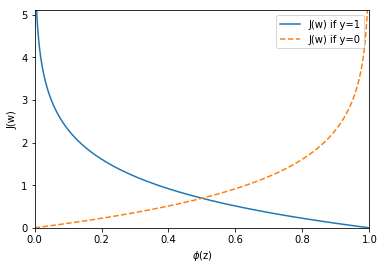

In [3]:
def cost_1(z):
    return - np.log(sigmoid(z))

def cost_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)
c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label="J(w) if y=1")
c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle="--", label="J(w) if y=0")
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel("$\phi$(z)")
plt.ylabel("J(w)")
plt.legend(loc="best")
plt.show()

In [7]:
from lrGD import LogisticRegressionGD
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,  # Leave 30% for testing
                                                    random_state=1,
                                                    # Statically determined for reproducibility
                                                    stratify=y)
                                                    # Ensure that the percentages in y are roughly replicated
                                                    # in the train and test dataset. This corrects for
                                                    # imbalanced populations.

# Considering only two species out of three, Setosa and Vescicolor            
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train ==0) | (y_train ==1)]
lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)

In [9]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    # setup marker generator and color map
    markers = ("s", "x", "o", "^", "v")
    colors = "red blue lightgreen gray cyan".split()
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y==cl, 1],
                   alpha=0.8, c=colors[idx], marker=markers[idx], label=cl,
                   edgecolor="black")
        # highlight the test samples
        if test_idx:
            # Plot all samples
            X_test, y_test = X[test_idx, :], y[test_idx]
            plt.scatter(X_test[:, 0], X_test[:, 1], c="", edgecolor="black", alpha=1.0,
                       linewidth=1, marker="o", s=100, label="test set")
        else:
            pass
        continue
        
    return

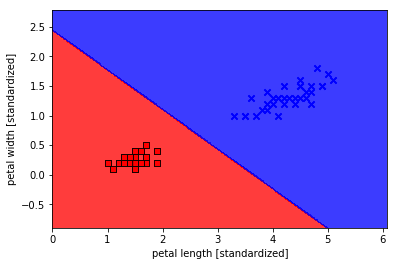

In [13]:
plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)
plt.xlabel("petal length [standardized]")
plt.ylabel("petal width [standardized]")
# plt.legend()
plt.show()

In [14]:
# Now let's start to use the proper SKLearn functions, which are more optimised than our proofs of concept

from sklearn.linear_model import LogisticRegression

help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model.logistic:

class LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassifierMixin, sklearn.linear_model.base.SparseCoefMixin)
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the cross-
 |  entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag' and 'lbfgs' solvers. It can handle
 |  both dense and sparse input. Use C-ordered arrays or CSR matrices
 |  containing 64-bit floats for optimal performance; any other input format
 |  will be converted (and copied).
 |  
 |  The 'newton-cg', 'sag', and 'lbfgs' solve

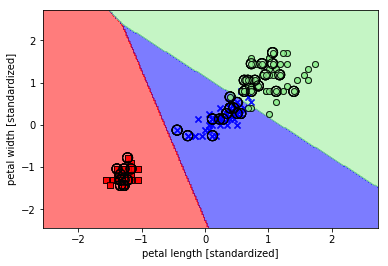

In [16]:
# Standardize the input data for better handling by the classifiers

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
# IMPORTANT! Use the same scaling parameters for train and test to make them comparable!
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# Create the logistic classifier

lr = LogisticRegression(C=100.0, random_state=1)  # C= regularization, with 100 it should be pretty weak
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel("petal length [standardized]")
plt.ylabel("petal width [standardized]")
# plt.legend(loc="upper left")
plt.show()

In [17]:
# Calculate the probabilities for each sample to belong to the class chosen by the classifier

lr.predict_proba(X_test_std[:3,:])

array([[3.20136878e-08, 1.46953648e-01, 8.53046320e-01],
       [8.34428069e-01, 1.65571931e-01, 4.57896429e-12],
       [8.49182775e-01, 1.50817225e-01, 4.65678779e-13]])

In [21]:
print(lr.predict_proba(X_test_std[:3,:]).argmax(axis=1)) # Manual approximation of a direct predict call
print(lr.predict(X_test_std[:3,:]))  # Direct call

[2 0 0]
[2 0 0]


(10, 2)


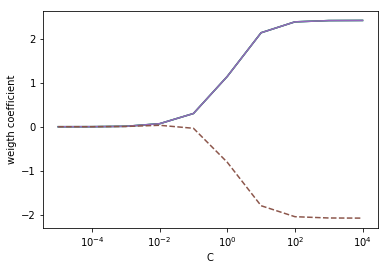

In [28]:
# The parameter C controls the regularization strength.

weights, params = [], []

for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
    continue

assert len(weights) > 0
weights = np.array(weights)
print(weights.shape)
plt.plot(params, weights[:,0], label="petal length")
plt.plot(params, weights[:,1], linestyle="--", label="petal width")
plt.ylabel("weigth coefficient")
plt.xlabel("C")
plt.xscale("log")
plt.show()

In [29]:
# SVMs

## In the SVM paradigm, the idea is to find the separation boundary between the classes of samples, and then
## define the hyperplanes of each class. The hyperplanes should be defined so that their distance
## is the theoretical maximum that can be obtained while still categorizing the samples correctly.
## The hyperplanes should be both parallel to the decision boundary.
## Given a vector of weights w, then, which is present in the definition of both hyperplanes, their distance
## is 2/||w||; the name of the game is to maximize this margin while maintaining the correctness
## of the classification by hyperplanes.

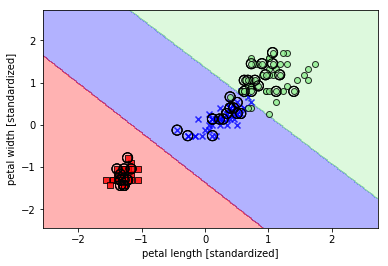

In [31]:
from sklearn.svm import SVC
svm = SVC(kernel="linear", C=1.0, random_state=1)  # As C is very low, we are being very lenient

svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel("petal length [standardized]")
plt.ylabel("petal width [standardized]")
plt.show()

In [32]:
## The default implementations of the logistic regression and SVM in SKLearn rely on two different C/C++
## libraries, LibLinear and LIBSVM. These two libraries are very fast, but can deal poorly with large amounts
## of data due to memory overflow. Because of this, SKLearn also provides alternative implementations, which
## are also more amenable to stochastic methods.

from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss="perceptron")
lr = SGDClassifier(loss="log")
svm = SGDClassifier(loss="hinge")

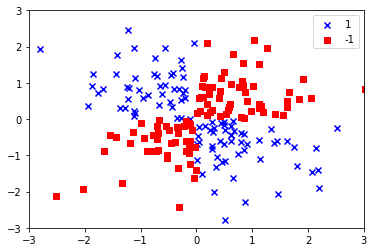

In [33]:
## The main attraction in terms of flexibility of SVMs over Logistic Regression is their ability to deal
## with **non-linear** problems.
## Here we create a dataset with such features:

np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:,0] > 0, X_xor[:,1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c="b", marker="x", label=1)
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c="r", marker="s", label=-1)
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc="best")
plt.show()



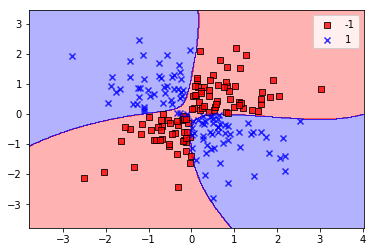

In [44]:
## The idea behind kernel methods is to use a function to map this non-linearly separable data
## onto a higher dimensional space, in such a way that linear separation becomes achievable. It is then
## possible to map the hyperplane boundary found in the higher dimensional space onto the original space.
## Of course, application of the mapping function adds quite a computational overhead!
## The *kernel function* is a similarity function between samples, which makes the computation tractable.

## There are different kernel functions that can be applied to the data. One of the most popular is the RBF,
## Radial Basis Function, also known as Gaussian Kernel

gaussian_svm = SVC(kernel="rbf", random_state=1, gamma=0.2, C=100.0)
## The C parameter determines how tight the boundaries will be; greater number = tighter
## The Gamma parameter controls the fit. The higher, the more the algorithm will try to fit the data,
## leading to potential overfit.

gaussian_svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=gaussian_svm)
plt.legend(loc="best")
plt.show()

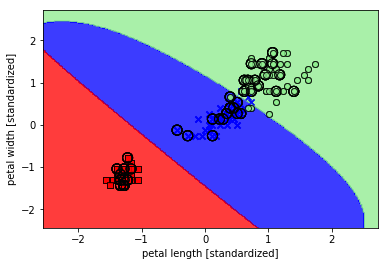

In [52]:
## Now let us apply the RBF to the Iris dataset

svm = SVC(kernel="rbf", random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel("petal length [standardized]")
plt.ylabel("petal width [standardized]")
plt.show()

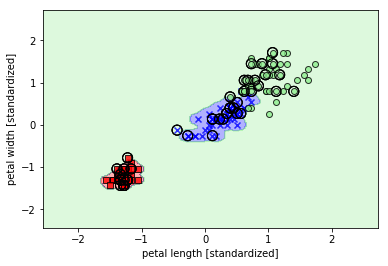

In [53]:
## If we apply a tighter (=higher) gamma, we will get a more precise but less flexible categorization

svm = SVC(kernel="rbf", random_state=1, gamma=100, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel("petal length [standardized]")
plt.ylabel("petal width [standardized]")
plt.show()